In [1]:
import math;
import copy;
import numpy as np;
import matplotlib.pyplot as plt;

dataSet: [[-22.60078114 -34.39671758 -16.68636388 ...   6.26486255 -18.71943945
  -16.71113244]]
Exp: [[0.51174863 0.48825137]
 [0.51778296 0.48221704]
 [0.50872166 0.49127834]
 ...
 [0.49697127 0.50302873]
 [0.50976226 0.49023774]
 [0.50873434 0.49126566]]
Miu: [-7.05482814  0.5598075 ]
Miu: [-7.05482814 -6.25307076]
Exp: [[0.58786649 0.41213351]
 [0.64973174 0.35026826]
 [0.55562685 0.44437315]
 ...
 [0.42856328 0.57143672]
 [0.56677643 0.43322357]
 [0.55576304 0.44423696]]
Miu: [-10.88883333   0.5844788 ]
Miu: [-10.88883333  -2.40703635]
Exp: [[0.97721441 0.02278559]
 [0.99855437 0.00144563]
 [0.91412769 0.08587231]
 ...
 [0.04554995 0.95445005]
 [0.94501355 0.05498645]
 [0.91458467 0.08541533]]
Miu: [-20.47836172   0.72672876]
Miu: [-20.47836172  15.369005  ]
Exp: [[9.99999998e-01 2.14288872e-09]
 [1.00000000e+00 1.69749965e-14]
 [9.99999226e-01 7.73940694e-07]
 ...
 [1.53424628e-04 9.99846575e-01]
 [9.99999898e-01 1.02211093e-07]
 [9.99999245e-01 7.55086052e-07]]
Miu: [-20.0332255

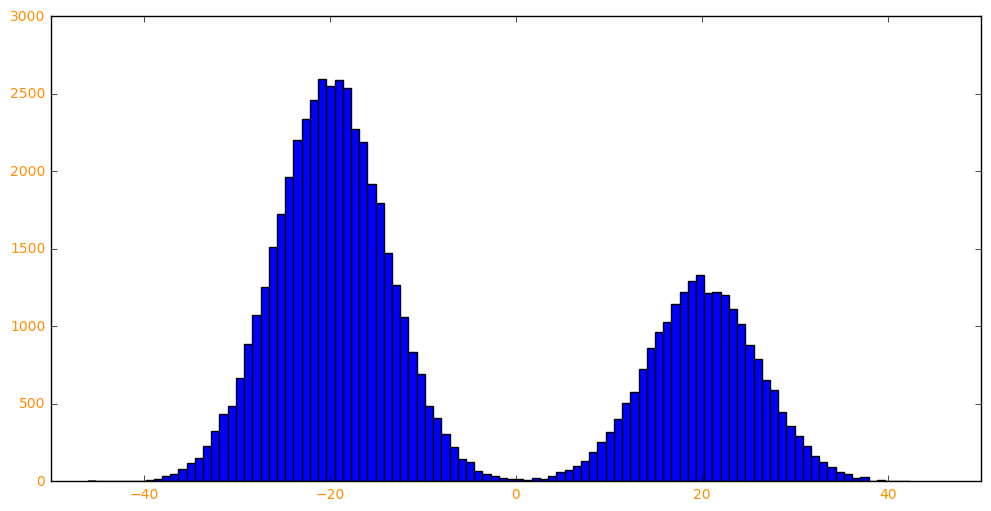

In [10]:
isdebug = True  
  
# 指定k个高斯分布參数。这里指定k=2。注意2个高斯分布具有同样均方差Sigma，分别为M1,M2。  
def getdataSet(Sigma,M1,M2,k,N):  
    #创建长度为N的数据
    dataSet = np.zeros((1,N))
    for i in range(N): 
        #为数据赋值，并随机分开两组数据
        if np.random.random(1) > 0.333:  
            dataSet[0,i] = np.random.normal()*Sigma + M1  
        else:  
            dataSet[0,i] = np.random.normal()*Sigma + M2  
    if isdebug:  
        print ("dataSet:",dataSet)  
    return dataSet  
  
  
# E算法：计算期望E[zij]  
def E(Sigma,dataSet,Miu,k,N):  
    #创建概率数组
    Exp = np.zeros((N,k))  
    Num = np.zeros(k)  
    for i in range(N):  
        Sum = 0  
        for j in range(k): 
            #求数据的高斯分布概率
            Num[j] = math.exp((-1/(2*(float(Sigma**2))))*(float(dataSet[0,i]-Miu[j]))**2)  
            Sum += Num[j]  
        for j in range(k): 
            #求没类数据在各类中的占比，即隐藏变量Z
            Exp[i,j] = Num[j] / Sum  
    if isdebug:  
        print ("Exp:",Exp)  
  
    return Exp  
  
# M算法：最大化E[zij]的參数Miu  
def M(Exp,dataSet,k,N):  
    Miu = np.random.random(k)  
    for j in range(k):  
        Num = 0  
        Sum = 0  
        for i in range(N):  
            Num += Exp[i,j]*dataSet[0,i]  
            Sum += Exp[i,j]  
        Miu[j] = Num / Sum 
        if isdebug:
            print("Miu:",Miu)
    return Miu  
  
  
  
#初始参数  
Sigma = 6  
M1 = -20  
M2 = 20  
k=2  
N=0xffff #65535 
Iter=0xff  
EPS =1e-6  

#随机初始数据  
dataSet=getdataSet(Sigma,M1,M2,k,N)  
  
#初始先假设一个E[zij]  
Miu = np.random.random(2)  
# 算法迭代  
for i in range(Iter):  
    oldMiu = copy.deepcopy(Miu)  
    #E  
    Exp = E(Sigma,dataSet,Miu,k,N)  
    #M  
    Miu = M(Exp,dataSet,k,N)  
    #如果达到精度Epsilon停止迭代  
    if sum(abs(Miu-oldMiu)) < EPS:  
       if isdebug: 
            print ("Iter:",i)
       break  
print("MIU:",Miu)
plt.figure('emmmmm',figsize=(12, 6))   
plt.hist(dataSet[0,:],100)  
plt.xticks(fontsize=10, color="darkorange")    
plt.yticks(fontsize=10, color="darkorange")   
plt.show()  